<a href="https://colab.research.google.com/github/Riddhima1Mathur/foundations-of-data-science-phase1/blob/main/health.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

✅ Sample healthcare dataset created and saved as 'healthcare_data.csv'.
  Patient_ID  Age  Gender  Disease_Type Admission_Date  Hospital_Stay_Days  \
0       P001   45    Male      Diabetes     2024-01-01                   5   
1       P002   62  Female  Hypertension     2024-01-16                   7   
2       P003   28    Male      Fracture     2024-01-31                   4   
3       P004   70  Female       Cardiac     2024-02-15                  10   
4       P005   55    Male        Asthma     2024-03-01                   3   

   Treatment_Cost  Readmission_Count  
0           22000                  0  
1           35000                  1  
2           18000                  0  
3           60000                  1  
4           12000                  0  

Missing Values:
 Patient_ID            0
Age                   0
Gender                0
Disease_Type          0
Admission_Date        0
Hospital_Stay_Days    0
Treatment_Cost        0
Readmission_Count     0
dtype: int64

C

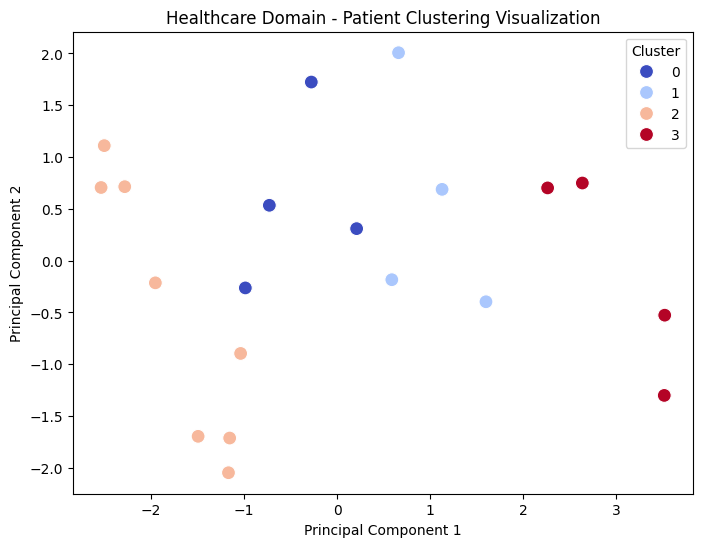

/tmp/ipython-input-2869923479.py:96: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Cluster", y="Treatment_Cost", data=df, palette="Set3")


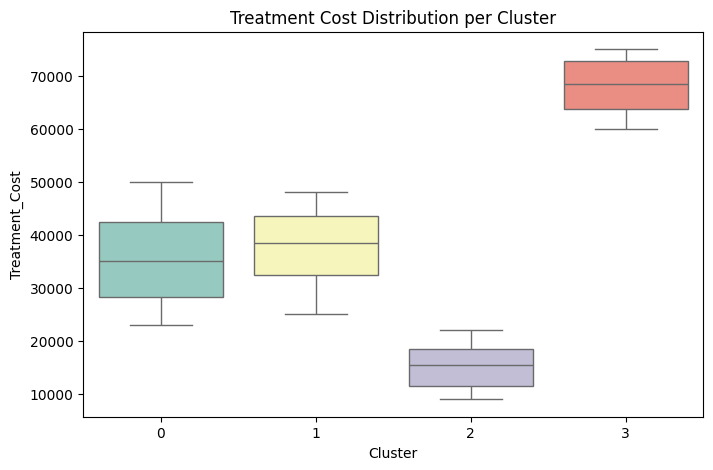


Cluster Summary:
            Age  Hospital_Stay_Days  Treatment_Cost  Readmission_Count
Cluster                                                              
0        50.75               6.750         35750.0                0.0
1        63.25               7.000         37500.0                1.0
2        37.25               3.375         15250.0                0.0
3        75.00              11.500         68000.0                1.0

✅ Analysis Complete. Results saved as 'healthcare_clustered_results.csv'.


In [3]:
# ===============================
# HEALTHCARE DOMAIN ANALYSIS
# ===============================
# Phase II & III – Data Handling, Clustering, and Visualization
# Author: Riddhima Mathur
# ===============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# ---------------------------------
# STEP 1: CREATE OR IMPORT DATASET
# ---------------------------------

# If you already have a CSV file, comment the code below and load your file using:
# df = pd.read_csv("healthcare_data.csv")

# Create a sample dataset manually
data = {
    "Patient_ID": [f"P{str(i).zfill(3)}" for i in range(1, 21)],
    "Age": [45, 62, 28, 70, 55, 39, 80, 47, 60, 25, 35, 50, 67, 73, 41, 58, 64, 30, 77, 48],
    "Gender": ["Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female",
               "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female", "Male", "Female"],
    "Disease_Type": ["Diabetes", "Hypertension", "Fracture", "Cardiac", "Asthma", "Flu",
                     "Arthritis", "Cardiac", "Hypertension", "Fracture", "Asthma", "Diabetes",
                     "Flu", "Cardiac", "Arthritis", "Hypertension", "Diabetes", "Flu", "Cardiac", "Asthma"],
    "Admission_Date": pd.date_range(start="2024-01-01", periods=20, freq="15D"),
    "Hospital_Stay_Days": [5,7,4,10,3,2,12,9,8,3,4,6,5,11,4,7,8,2,13,5],
    "Treatment_Cost": [22000,35000,18000,60000,12000,9000,72000,50000,42000,14000,
                       17000,30000,25000,65000,20000,40000,48000,10000,75000,23000],
    "Readmission_Count": [0,1,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0]
}

df = pd.DataFrame(data)

# Save dataset (optional)
df.to_csv("healthcare_data.csv", index=False)
print("✅ Sample healthcare dataset created and saved as 'healthcare_data.csv'.")
print(df.head())

# ---------------------------------
# STEP 2: DATA CLEANING
# ---------------------------------

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Encode categorical data
le_gender = LabelEncoder()
df["Gender"] = le_gender.fit_transform(df["Gender"])

le_disease = LabelEncoder()
df["Disease_Type"] = le_disease.fit_transform(df["Disease_Type"])

# Drop irrelevant or non-numeric columns for clustering
X = df[["Age", "Gender", "Disease_Type", "Hospital_Stay_Days", "Treatment_Cost", "Readmission_Count"]]

# ---------------------------------
# STEP 3: DATA SCALING
# ---------------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# ---------------------------------
# STEP 4: K-MEANS CLUSTERING
# ---------------------------------
kmeans = KMeans(n_clusters=4, random_state=42)
df["Cluster"] = kmeans.fit_predict(X_scaled)

print("\nCluster Distribution:\n", df["Cluster"].value_counts())

# ---------------------------------
# STEP 5: DIMENSIONALITY REDUCTION (PCA)
# ---------------------------------
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
df["PCA1"], df["PCA2"] = pca_result[:,0], pca_result[:,1]

# ---------------------------------
# STEP 6: VISUALIZATION
# ---------------------------------
plt.figure(figsize=(8,6))
sns.scatterplot(x="PCA1", y="PCA2", hue="Cluster", palette="coolwarm", data=df, s=100)
plt.title("Healthcare Domain - Patient Clustering Visualization")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Boxplot for treatment cost per cluster
plt.figure(figsize=(8,5))
sns.boxplot(x="Cluster", y="Treatment_Cost", data=df, palette="Set3")
plt.title("Treatment Cost Distribution per Cluster")
plt.show()

# ---------------------------------
# STEP 7: CLUSTER CHARACTERISTICS
# ---------------------------------
cluster_summary = df.groupby("Cluster")[["Age","Hospital_Stay_Days","Treatment_Cost","Readmission_Count"]].mean()
print("\nCluster Summary:\n", cluster_summary)

# Save results
df.to_csv("healthcare_clustered_results.csv", index=False)
print("\n✅ Analysis Complete. Results saved as 'healthcare_clustered_results.csv'.")
